<a href="https://colab.research.google.com/github/lxh6530/IEP2lab1/blob/main/Lab0_IEPII_Spr25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 0 Overview
This lab is a coding exercise in Python, intended to introduce you to functions (Sec. 1) and classes (Sec. 2) in order to write code that computes the total electric field produced by a collection of point charges (Sec 3). The introduction to functions and classes here is by no means exhaustive and you can refer to many other resources on the internet for further details related to these concepts.

# Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Functions in Python

The internet has many excellent Python coding tutorials for beginners.
[Here](https://www.w3schools.com/python/python_functions.asp) and [here](https://www.programiz.com/python-programming/function) are a couple useful examples of tutorials that you might want to look at or work through if you aren't familiar with functions in Python. You can also look for different tutorials by Googling and/or ask your TA for help.

## Exercise 1.1: Our first function definition
Here is a very simple function that doesn't do much. Notice the syntax:

`def` means you are defining a function\
`myFunction` is the name of the function\
`arg` is the argument (input) to the function


In [ ]:
def myFunction(arg):
  print('This function prints the argument: ')
  print(arg)

Since myFunction is defined in the cell above, you can now "call" the function. Try this now: put different values into the argument of myFunction and run the cell (shift + return) to see what it does.

In [ ]:
### BEGIN YOUR CODE
myFunction('test')
### END YOUR CODE

This function prints the argument: 
test


## Exercise 1.2: To return or not to return
Functions in Python are not *required* to return anything; nevertheless, you will usually want your functions to return something when they are called. We will see why in this exercise.

TODO: Fill in the content of the functions below.

In [ ]:
def sphereVolume_v1(radius):
  '''This function takes the radius of a sphere as its argument and doesn't return anything.'''

  vol = 4*np.pi*(radius**3)/3 ### TODO: Replace "None" with equation for volume of a sphere


def sphereVolume_v2(radius):
  '''This function takes the radius of a sphere as its argument and returns the volume of the sphere.'''

  vol = 4*np.pi*(radius**3)/3 ### TODO: Replace "None" with equation for volume of a sphere
  return vol

The second function, `sphereVolume_v2()`, returns the volume of the sphere when it is called, so we can get retrieve that number and use it later. Compare the behavior of `sphereVolume_v1()` and `sphereVolume_v2()` below. Note that function `sphereVolume_v1()` is not very useful, because it computes vol but we can't actually access it.

In [ ]:
volume1 = sphereVolume_v1(1)
volume2 = sphereVolume_v2(2)
print('Volume1: ', volume1)
print('Volume2: ', volume2)
### NOTE: Make sure you fill in the function definitions above before running this cell.

Volume1:  None
Volume2:  33.510321638291124


The function `sphereVolume_v2()` does not necessarily have to return a float. It can also return, e.g., an array:

Type of volumes:  <class 'numpy.ndarray'>


Text(0, 0.5, 'Volume of sphere')

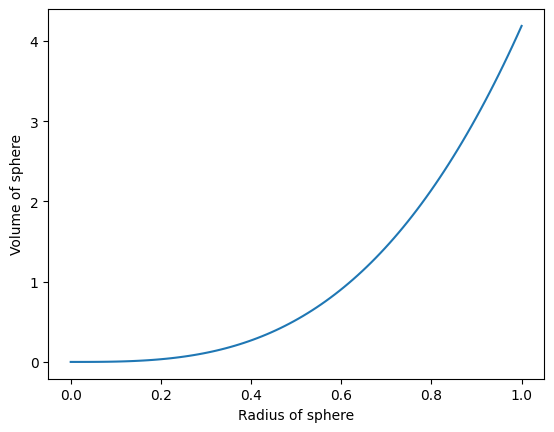

In [ ]:
### TODO: Run this cell using your defintion of sphereVolume_v2() above and check that it produces a sensible plot.
radii = np.linspace(0, 1, 100)
volumes = sphereVolume_v2(radii)
print('Type of volumes: ', type(volumes))

plt.plot(radii, volumes)
plt.xlabel('Radius of sphere')
plt.ylabel('Volume of sphere')

## Exercise 1.3: Scope of variables in Python

We could also write

```
vol = sphereVolume_v2(1)
```

Looking back at the definition of `sphereVolume_v2`, you will see that the variable `vol` is also used there. Despite the fact that we have used the variable `vol` twice, there is no clash between the two definitions.

This brings us to the idea of global vs local "scope" in Python. Variables defined inside functions are not defined outside of them.

In [ ]:
def demo():
  '''This function defines and prints myVar.'''
  myVar = 5
  print(myVar)

print('First, we run the function. myVar is printed: ')
demo()

print('Now, we try to print myVar outside the function demo() and generate a NameError: ')
print(myVar)

First, we run the function. myVar is printed: 
5
Now, we try to print myVar outside the function demo() and generate a NameError: 


NameError: name 'myVar' is not defined

TODO: Explain why there is an error when we try to print myVar.
---
Your answer here: myVar is only defined inside a functioin causing it to be a local variable. When it is then called outside of the function, since there is no global variable of myVar, it produces an error


TODO: Explain what will be printed by the following code snippet:
```
myVar = 6
print(myVar)
demo()
```
---
Your answer here:
6 5, 6 will be printed first because the print fuction is referring to the myVar declared outside of the function demo(). When demo() is called, it prints the myVar declared in the function.


## Exercise 1.4: Area of an annulus
TODO: Define a function that computes the area of an annulus, with inner radius $r_1$ and outer radius $r_2$.

In [ ]:
### TODO: YOUR CODE HERE
def annulusArea(r1, r2):
  return np.pi*(r2**2-r1**2)


TODO:

Curve 1: Fix $r_1 = 1.$ Compute and plot the area of the annulus for $$1\leq r_2 \leq 10,$$ with $r_2$ on the horizontal axis and the area on the vertical axis.

Curve 2: Fix $r_2 = 2$. Compute and plot the area of the annulus for $$0\leq r_1 \leq 3,$$ with $r_1$ on the horizontal axis and the area on the vertical axis.

Using `fig, ax = plt.subplots(1,2)`, plot curve 1 and curve 2 on side-by-side plots. Use your function defined above. Label all axes.

Text(0.5, 0, 'r1')

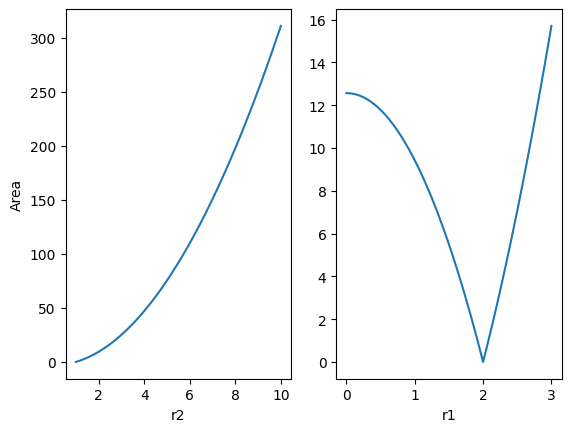

In [ ]:
### TODO: YOUR CODE HERE

r1 = 1
r2s = np.linspace(1, 10, 100)
areas = annulusArea(r1, r2s)
fig, ax = plt.subplots(1,2)
ax[0].plot(r2s, areas)
ax[0].set_xlabel('r2')
ax[0].set_ylabel('Area')

r2 = 2
r1s = np.linspace(0, 3, 100)
areas = annulusArea(r1s, r2)
areas = abs(areas)
ax[1].plot(r1s, areas)
ax[1].set_xlabel('r1')



# 2. Classes in Python
Python is an object-oriented programming language, meaning that you can define objects called classes. We have actually already encountered a few of Python's built-in classes in Assignment 1; these built-in classes include integers, strings, lists and dictionaries.

Let's begin by defining our own simple class called `IEP_student`.

## Exercise 2.1 Our first class definition

This code snippet defines a class named `IEP_student`, with attributes "name", "major" and "year":
```
class IEP_student:
  def __init__(self, name, major, year):
    self.name = name
    self.major = major
    self.year = year
```

After you define the class, you can create an instance of the class as follows:
```
s1 = IEP_student('Khush', 'physics', 'sophomore')
```
This line of code creates an instance of the class `IEP_student` called `s1`, whose properties are `name = Khush, major = Physics, year = Sophomore`. The ``__init__`` method is called automatically whenever we create an instance, such as `s1`, of the `IEP_student` class.

So the class is a blueprint that is used to keep track of general, abstract properties that all students in IEP II possess. Each instance of the class is a specific student.

TODO: Since you are an IEP student, create an instance of the class that represents yourself, and two more instances that represent classmates in your lab section.

In [ ]:
### TODO: YOUR CODE HERE
class IEP_student:
  def __init__(self, name, major, year):
    self.name = name
    self.major = major
    self.year = year

s2 = IEP_student('Lilly', 'physics', 'Freshman')
s3 = IEP_student('Lila', 'physics', 'Freshman')
s4 = IEP_student('Bradely', 'physics', 'Freshman')

TODO: There might be other properties of IEP II students that would be useful to keep track of. Add two more attributes to `__init__ ` in the IEP_student class, and re-initialize yourself and your two classmates with these extra properties. For example, you could add the attributes `hobbies` and `lab section`:
```
class IEP_student:
  def __init__(self, name, major, year, hobbies, lab_section):
    self.name = name
    self.major = major
    self.year = year
    self.hobbies = hobbies
    self.lab_section = lab_section
```
(Now that I have used `hobbies` and `lab_section` as examples, think of two other attributes to add.)

In [ ]:
### TODO: YOUR CODE HERE
class IEP_student:
  def __init__(self, name, major, year, hobbies, lab_section, professor, gpa):
    self.name = name
    self.major = major
    self.year = year
    self.hobbies = hobbies
    self.lab_section = lab_section
    self.professor = professor
    self.gpa = gpa

We will now add a method to our IEP_student class. A method is an attribute of the class that is a *function*.

```
class IEP_student:
  def __init__(self, name, major, year):
    self.name = name
    self.major = major
    self.year = year

  def introduce(self):
    print("Hello, my name is {}. I am a {} major at NYU and I am a {}."format(self.name, self.major, self.year))
```
After adding the method `introduce` to our class, we can now create an instance and call the method:
```
s1 = IEP_student('Khush', 'physics', 'sophomore')
s1.introduce()
```



TODO: What happens if you call s1.introduce()?

---

Your answer here:

it will print : Hello my name is Khush. I am a physics major at NYU and I am a sophomore.

TODO: Earlier, you created IEP_student instances of yourself and two classmates. Now call the method `introduce()` to introduce all the students.

In [ ]:
### TODO: YOUR CODE HERE
class IEP_student:
  def __init__(self, name, major, year):
    self.name = name
    self.major = major
    self.year = year

  def introduce(self):
    print("Hello, my name is {}. I am a {} major at NYU and I am a {}.".format(self.name, self.major, self.year))

s2 = IEP_student('Lilly', 'physics', 'Freshman')
s3 = IEP_student('Lila', 'physics', 'Freshman')
s4 = IEP_student('Bradely', 'physics', 'Freshman')

s2.introduce()
s3.introduce()
s4.introduce()


Hello, my name is Lilly. I am a physics major at NYU and I am a Freshman.
Hello, my name is Lila. I am a physics major at NYU and I am a Freshman.
Hello, my name is Bradely. I am a physics major at NYU and I am a Freshman.


## Exercise 2.2 `list` as a Python class
You just created your own class called `IEP_student` and defined some useful attributes. Let's now connect these ideas to Python lists, which are a built-in class in Python.

In [ ]:
myList = list() # create an instance of the class list() called myList

TODO: Append the string `'test'` to `myList`.

In [ ]:
### TODO: YOUR CODE HERE

myList.append('test')

print(myList)
print(type(myList))
print(type(s2))
dir(s2)

['test', 'test', 'test', 'test', 'test']
<class 'list'>
<class '__main__.IEP_student'>


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'major',
 'name',
 'year']

From IEP I and Assignment 1 you already understand what your code above does, but now let's think about it from this new perspective: `list` in Python is a built-in class. `myList` is a particular instance of the class `list`. The class `list` has a method `append(arg)`, which appends `arg` to the end of the list.  

This is completely analogous to what we did when we wrote our own new class in Exercise 2.1: `IEP_student` is a class we defined. `s1` is a particular instance of the class `IEP_student`. The class `IEP_student` has a method `introduce()`, which prints some information about the student's attributes.

TODO: Explain what is printed by the code snippet below, and what it means.
```
print(type(myList))
print(type(s1))
```
---
Your answer here:

<class 'list'>
<class '__main__.IEP_student'>

This means that the instances of myList and s2 belong to the classes of list and IEP_student.


The `dir()` function is a useful built-in Python function that lists all the attributes and methods of an object.

TODO: use `dir()` on `list` and `IEP_student`. Report what is returned. In particular, `dir(IEP_student)` will return some attributes that we did not define explicitly. What is going on?

---
Your answer here:

Thhe attributes of the different classes are returned. The fuction returned some attributes we didnt define because those are attributes already built in wen you define a class. These attributes allow you to buil off of that class, and get information from it.


# 3. Compute electric field of point particle(s)
Now we come to the physics/E&M content of this coding lab Lab 0, in which we will write code to compute the electric field created by an arbitrary distribution of point charges.

## Exercise 3.1 Electric field of a point charge
TODO: Make a vector plot of the electric field in the $xy$ plane of a point charge with charge $q$ located at the origin, $r = [0,0,0]$. In this lab, we will denote the elementary charge as $q$, and we will use this as the fundamental unit of charge. Hence, you can let the charge `q = 1` in your code. For an object with charge $Q = 5q$, you can define `Q=5`. And so on.

You can also set $k \equiv \frac{1}{4\pi\epsilon_0} = 1$ for all of your work in this lab.

For your plot, let $x$ and $y$ range from (-10,10).

Hint: use the matplotlib function `quiver`. Your result should look something like the graph here:


<img src="https://drive.google.com/uc?id=1E-vFnO6YePVbvxXAAbjTDFFqIuDOxemS" width="400">



Text(0.5, 1.0, 'Electric field in the XY plane produced by point charge q located at the origin')

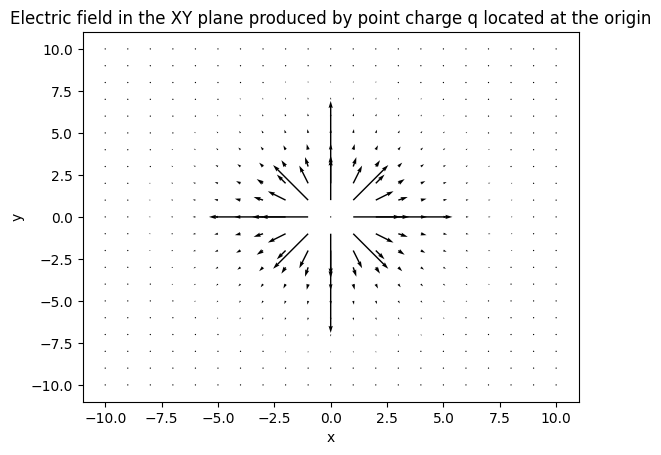

In [ ]:
xPts = np.linspace(-10,10,21)
yPts = np.linspace(-10,10,21)
x, y = np.meshgrid(xPts, yPts) # define a grid

k = 1 # by definition in this lab
charge = 1 # define charges in units of q

r = np.sqrt(x**2 + y**2)### TODO: YOUR CODE HERE
r [r==0]= 1
fieldMagnitude = k*charge/(r**2) ### TODO: YOUR CODE HERE. Compute the magnitude of the field.
fieldX = fieldMagnitude*x/r ### TODO: YOUR CODE HERE. Compute the x-component of the field.
fieldY =fieldMagnitude*y/r ### TODO: YOUR CODE HERE. Compute the y-component of the field.
fieldZ = 0  ### TODO: YOUR CODE HERE. Compute the z-component of the field.

plt.quiver(x, y, fieldX, fieldY, scale= 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electric field in the XY plane produced by point charge q located at the origin')

## Exercise 3.2: Electric dipole field (two point charges)

TODO: Now make a vector plot of the ***total*** electric field in the $xy$ plane produced by (i) a point charge with charge $q$ located at $r = [-4,0, 0]$ and (ii) a point charge with charge $-q$ located at $r = [4,0, 0]$.

For your plot, let $x$ and $y$ range from (-10,10).

Hints:
1. Use the matplotlib function `quiver`. Your result should look something like the graph below.
2. You may want to compute and plot the fields produced by (i) and (ii) separately and then add them.

<img src="https://drive.google.com/uc?id=1MNhSno7xNr3vBZQgDv2D2wKO20r286K-" width="400">


Text(0.5, 1.0, 'Electric field in the XY plane produced by dipole')

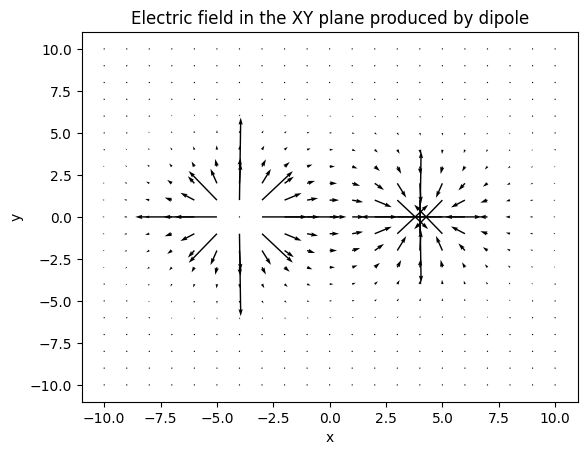

In [97]:
### TODO: YOUR CODE HERE
xPts = np.linspace(-10,10,21)
yPts = np.linspace(-10,10,21)
x, y = np.meshgrid(xPts, yPts) # define a grid

k = 1 # by definition in this lab
charge = 1 # define charges in units of q


r1 = np.sqrt((x+4)**2 + y**2)### TODO: YOUR CODE HERE
r2 = np.sqrt((x-4)**2 + y**2)### TODO: YOUR CODE HERE
r = np.sqrt(x**2 + y**2)
r1 [r1==0]= 1
r2 [r2==0]= 1
fieldMagnitude1 = (k*charge/(r1**2))
fieldMagnitude2= (-k*charge/(r2**2)) ### TODO: YOUR CODE HERE. Compute the magnitude of the field.

fieldX1 = fieldMagnitude1*(x+4)/r1 ### TODO: YOUR CODE HERE. Compute the x-component of the field.
fieldY1 =fieldMagnitude1*y/r1 ### TODO: YOUR CODE HERE. Compute the y-component of the field.

fieldX2 = fieldMagnitude2*(x-4)/r2 ### TODO: YOUR CODE HERE. Compute the x-component of the field.
fieldY2 =fieldMagnitude2*y/r2 ### TODO: YOUR CODE HERE. Compute the y-component of the field.

fieldX = fieldX1 + fieldX2
fieldY = fieldY1 + fieldY2
plt.quiver(x, y, fieldX, fieldY, scale= 6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electric field in the XY plane produced by dipole')

## Exercise 3.3: Write the class `pointCharge`
Now that you have thought about how to calculate and plot the fields produced by a single point charge and two point charges (the simplest two cases), we will think about how to write code to calculate the field produced by an arbitrary distribution of point charges.

In the process of adding together the field produced by more and more charges, you would keep doing the same procedure repeatedly. In this kind of situation, it seems clear that we should write a class to make such repetition easier, faster, and less prone to human error.


Therefore, we are going to write a class to represent point charges, with methods that help us to compute and plot the field produced by each charge.

```
class pointCharge:
  def __init__(self, prop1, prop2, ...):
    self.prop1 = prop1
    self.prop2 = prop2
    ...

  def computeField(self, args):
    pass

  def plotField(self, args):
    pass
```



### Exercise 3.3i
TODO: What properties of the point charge should we define when initializing a point charge object (i.e., what would be useful prop1, prop2, ... values)?

Hint: what variables did you have to define (repeatedly) when you worked on Exercises 3.1 and 3.2?

---
Your answer here:

Position, charge

### Exercise 3.3ii
TODO: Write the `__init__` method for your class based on your answer above. Then, add methods `computefield()` and `plotField()` to your class that compute and plot the electric field produced by the point charge. You might want to check that your methods are working correctly by comparing the results of your `plotField()` function to your answers in Ex. 3.1 and 3.2.

In [165]:
class pointCharge:
    k = 1

    def __init__(self, charge, xpos, ypos, start, end, amt):
        self.charge = charge
        self.xpos = xpos
        self.ypos = ypos
        self.position = [xpos, ypos]

        self.xPts = np.linspace(start, end, amt)
        self.yPts = np.linspace(start, end, amt)
        self.x, self.y = np.meshgrid(self.xPts, self.yPts)

    def computeField(self):
        r_x = self.x - self.position[0]
        r_y = self.y - self.position[1]
        r = np.sqrt(r_x**2 + r_y**2)
        r [r==0]= 1

        fieldMagnitude = self.k * self.charge / (r**2)
        fieldX = fieldMagnitude * r_x / r
        fieldY = fieldMagnitude * r_y / r

        return fieldX, fieldY

    def plotField(self, array, s):
        fieldX, fieldY = computeTotalField(array)
        plt.quiver(self.xPts, self.yPts, fieldX, fieldY, scale=s)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Electric field in the XY plane')
        plt.show()


### Exercise 3.3iii
TODO: Write a function to compute the total field of a list of point charge objects.

In [166]:
### TODO: YOUR CODE HERE
def computeTotalField(ptchargearray):
    totalFieldx = 0
    totalFieldy = 0
    for charge in ptchargearray:
      if isinstance(charge, pointCharge):
        fieldx, fieldy = charge.computeField()
        totalFieldx = totalFieldx + fieldx
        totalFieldy = totalFieldy + fieldy
    return totalFieldx, totalFieldy

## Exercise 3.4 Use your code
Now that you've built a nice class, you can use it to make some fun plots with relatively little effort.

### Exercise 3.4i Electric quadrupole field
You already learned that an electric dipole consists of two charges $\pm Q$ separated by a distance $d$. An electric quadrupole consists of four charges placed at the corners of a square:
1. $+q$ at [1, 1, 0]
2. $+q$ at [-1,-1,0]
3. $-q$ at [1,-1,0]
4. $-q$ at [-1,1,0]


TODO: Plot the electric quadrupole field with $q = 1$.

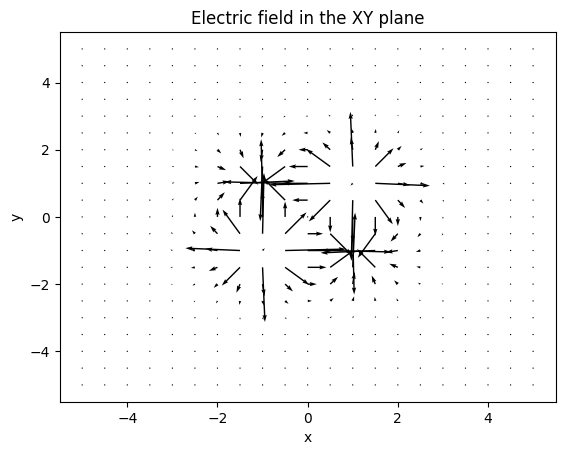

In [167]:
### TODO: YOUR CODE HERE
a= -5
b= 5
c= 21
Ptcharges = [pointCharge(1, 1, 1,a,b, c), pointCharge(1, -1, -1,a,b,c), pointCharge(-1, 1, -1,a,b,c), pointCharge(-1, -1, 1,a,b,c)]
Ptcharges[0].plotField(Ptcharges, 35)

### Exercise 3.4ii: Field between two parallel lines of charge $\pm Q$ spaced by distance $d$ (gain some important intuition for Coulomb balance lab!)

TODO:

Place 101 charges, each with charge $q$, equally spaced along a line with endpoints [-5, .25, 0] and [5, .25, 0].

Place 101 charges, each with charge $-q$, equally spaced along a line with endpoints [-5, -.25, 0] and [5, -.25, 0].

Plot the electric field in the $xy-$plane. For your plot, let $x$ and $y$ range from (-10,10).

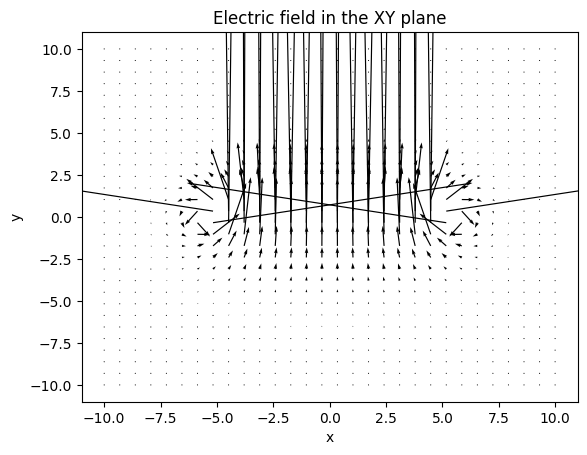

In [183]:
### TODO: YOUR CODE HERE

lines= []
xpositions = np.linspace(-5, 5, 101)
for i in range(101):
  lines.append(pointCharge(1, xpositions[i], .25, -10, 10, 30))
  lines.append(pointCharge(-1, xpositions[i], -.25, -10, 10, 30))

lines[0].plotField(lines, 90)

TODO: Examine and describe the field magnitude and direction between the two lines, above and below the two lines, and to the left and right of the two lines.

---

Your answer here:

below and above the two lines, the vectors are pointing upwards, but with a smaller magnitude than in between.

The field in between has the largest magnitude and is pointing upwards.

Once agin on the sides the field is weaker, but the vectors form a semicircle starting for the positive line and then curving down to connect with the bottom line.